# Understanding the dataset

Import Libraries

In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install imblearn
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, precision_recall_curve, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score, accuracy_score
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV
import warnings
warnings.filterwarnings("ignore")

import xgboost as xgb
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('creditcard.csv')

# Change the columm Class to Fraud
df.rename(columns={'Class': 'Fraud'}, inplace=True)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Check for Null Values
df.isnull().sum().max()

np.int64(0)

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Fraud'],
      dtype='object')

In [7]:
# Check class distribution
print("\nClass Distribution:\n", df['Fraud'].value_counts())

# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Fraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Fraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


Class Distribution:
 Fraud
0    284315
1       492
Name: count, dtype: int64
No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


# Visualization of Dataset

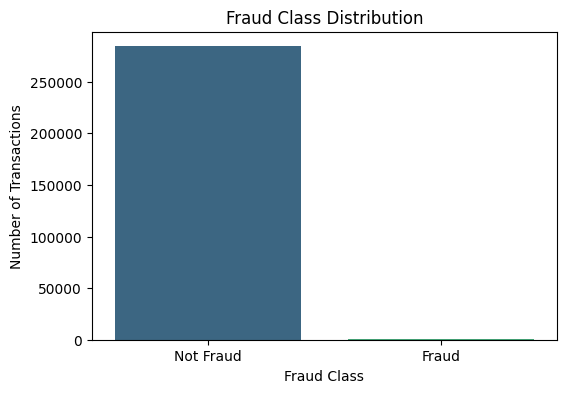

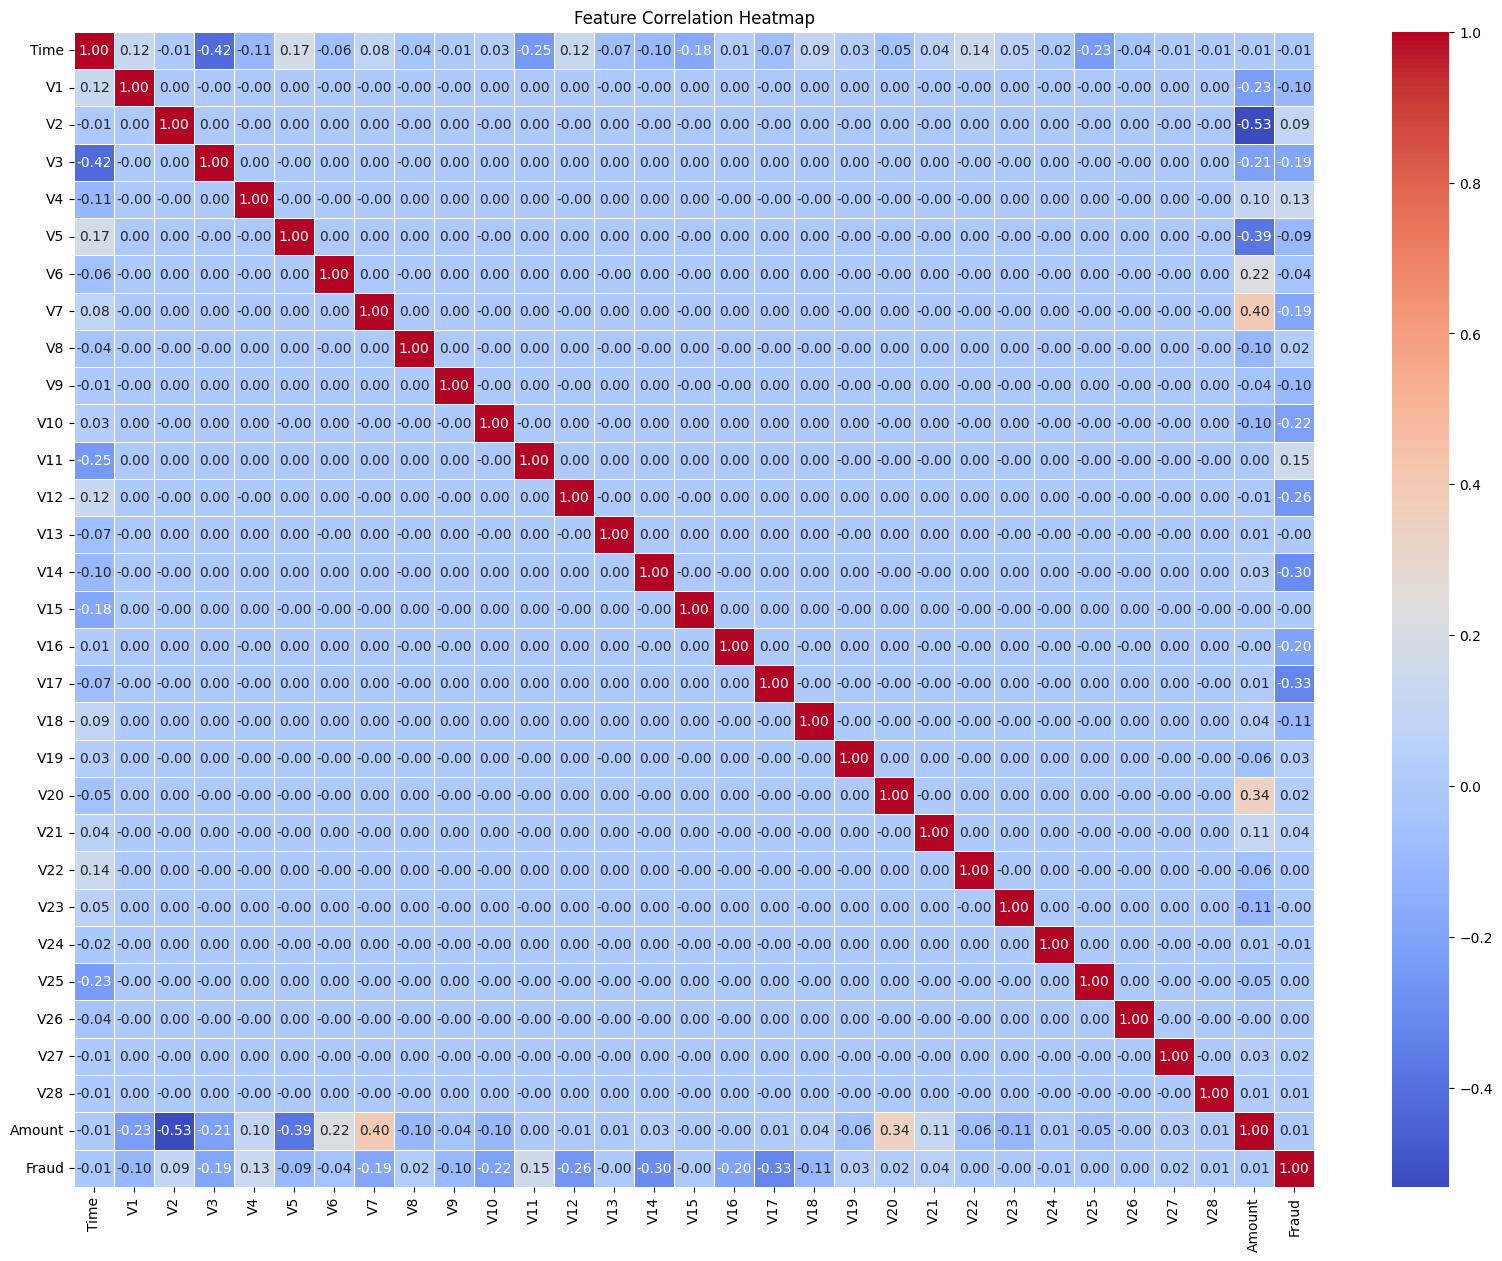

In [8]:
# Fraud Class Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=df["Fraud"].value_counts().index,
            y=df["Fraud"].value_counts().values,
            hue=df["Fraud"].value_counts().index,
            palette="viridis",
            legend=False)

plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.ylabel("Number of Transactions")
plt.xlabel("Fraud Class")
plt.title("Fraud Class Distribution")
plt.show()

# Select only numeric columns for correlation computation
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Feature Correlation Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Data Preprocessing

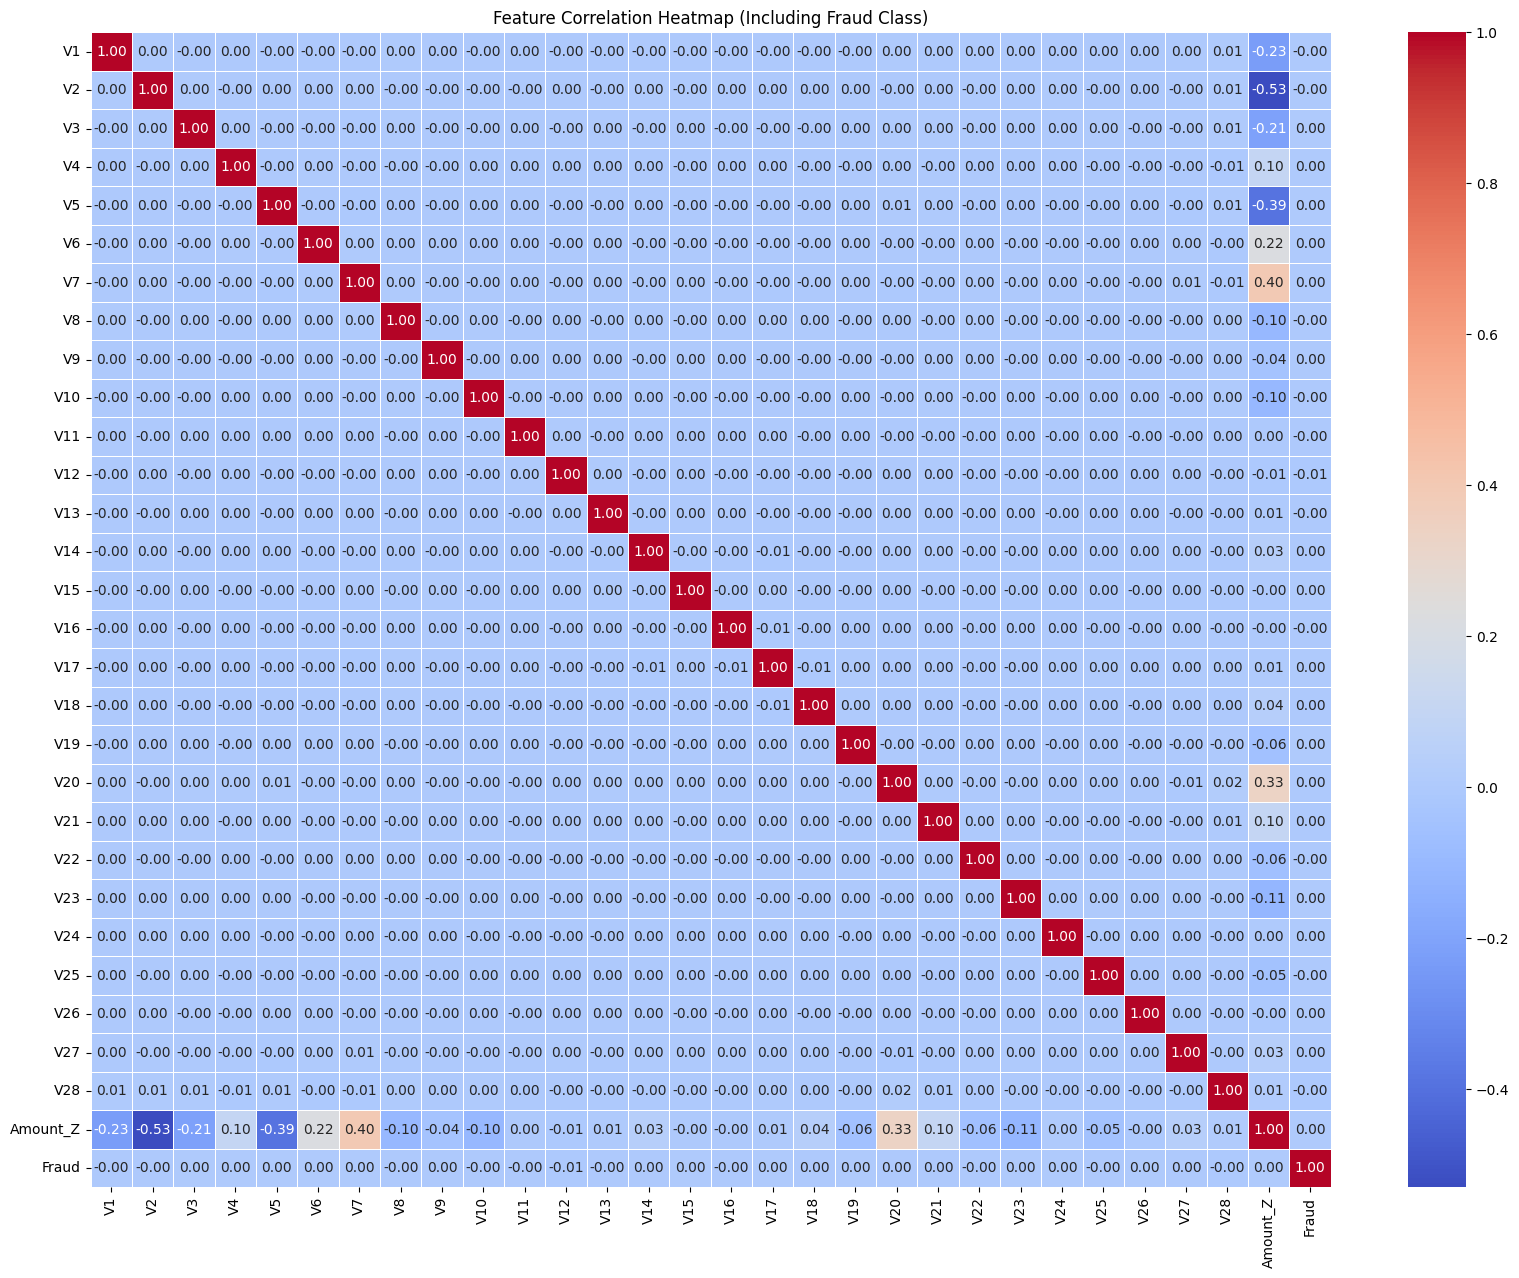

In [9]:
# Feature Engineering - Alternative Features
# 1. Standardize Transaction Amount
scaler = StandardScaler()         # Swap scaler to emphasize higher amounts
df["Amount_Z"] = scaler.fit_transform(df[["Amount"]])


df.drop(columns=["Amount", "Time"], inplace=True)

# Separate features and target variable
df = df.dropna(subset=['Fraud'])  # Remove rows where 'Fraud' is NaN
X = df.drop(columns=['Fraud'])
y = df['Fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert to DataFrame for feature selection
X_train = pd.DataFrame(X_train, columns=X.columns)
y_train = pd.Series(y_train)

# Normalize features
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Add Fraud column back for correlation analysis
X_train['Fraud'] = y_train

# Compute correlation matrix including Fraud
correlation_matrix = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Including Fraud Class)")
plt.show()

# Drop Fraud column again for model training
X_train = X_train.drop(columns=['Fraud'])

# Hyperparameter Tuning

In [10]:
# Define parameter grid for XGBoost hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__gamma': [0, 0.1, 0.2],
}

xgb_model = XGBClassifier(objective="binary:logistic", random_state=42, use_label_encoder=False, eval_metric="logloss")

# Use StratifiedKFold to maintain class balance
strat_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# HalvingGridSearchCV for hyperparameter tuning
search_start_time = time.time()
halving_search = HalvingGridSearchCV(
    xgb_model, param_grid, cv=strat_kfold, scoring='f1',
    factor=3, n_jobs=-1, verbose=1, random_state=42
)

# Fit the model using HalvingGridSearchCV on the training set with the selected features
halving_search.fit(X_train, y_train)
search_end_time = time.time()

# Get best hyperparameters
best_params = halving_search.best_params_

# Increase n_estimators for final training if needed (adjust as desired)
best_params['classifier__n_estimators'] = 300

# Remove the 'classifier__' prefix for easier assignment into the final model
best_params_clean = {key.replace('classifier__', ''): value for key, value in best_params.items()}

# Define final XGBoost model with optimized parameters in a pipeline
final_xgb_model = XGBClassifier(**best_params_clean, objective="binary:logistic", random_state=42, use_label_encoder=False, eval_metric="logloss")

# Train the final model
training_start_time = time.time()
final_xgb_model.fit(X_train, y_train)
training_end_time = time.time()

# Evaluate final model on test set
evaluation_start_time = time.time()
final_accuracy = final_xgb_model.score(X_test, y_test)
evaluation_end_time = time.time()

# Total execution time
end_time = time.time()

# Print time statistics
print("\n⏳ Total Time Taken:", round(end_time - search_start_time, 2), "seconds")
print("🔍 Hyperparameter Tuning Time:", round(search_end_time - search_start_time, 2), "seconds")
print("🎯 Final Model Training Time:", round(training_end_time - training_start_time, 2), "seconds")
print("📊 Model Evaluation Time:", round(evaluation_end_time - evaluation_start_time, 2), "seconds")

# Print best parameters and final model performance
print("✅ Best Parameters:", best_params_clean)
print("🎯 Final Model Accuracy:", final_accuracy)


n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 104
max_resources_: 227845
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 2187
n_resources: 104
Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
----------
iter: 1
n_candidates: 729
n_resources: 312
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
----------
iter: 2
n_candidates: 243
n_resources: 936
Fitting 3 folds for each of 243 candidates, totalling 729 fits
----------
iter: 3
n_candidates: 81
n_resources: 2808
Fitting 3 folds for each of 81 candidates, totalling 243 fits
----------
iter: 4
n_candidates: 27
n_resources: 8424
Fitting 3 folds for each of 27 candidates, totalling 81 fits
----------
iter: 5
n_candidates: 9
n_resources: 25272
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 6
n_candidates: 3
n_resources: 75816
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 7
n_candidates: 1
n_r

# Model Evaluation

Test set count: 56962

Best Threshold for F1-Score: 0.65

XGB Accuracy: 0.9995


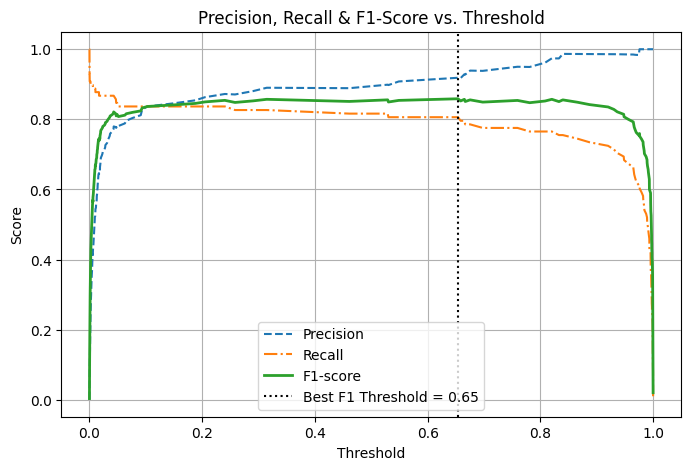


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56857     7]
 [   19    79]]

F1 Score: 0.86

Precision-Recall AUC Score: 0.8729827791779787


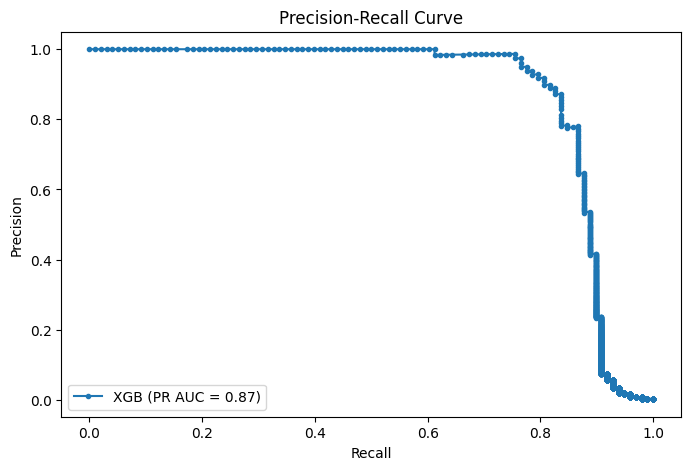

In [11]:
# Model Evaluation (Updated)
# Make Predictions
print(f"Test set count: {X_test.shape[0]}")

y_pred_proba = final_xgb_model.predict_proba(X_test)[:, 1]  # Get probability scores

# Compute Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Compute Precision-Recall AUC
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[f1_scores.argmax()]

print(f"\nBest Threshold for F1-Score: {best_threshold:.2f}")

# Convert Probabilities into Binary Predictions Using Best Threshold
y_pred_adjusted = (y_pred_proba >= best_threshold).astype(int)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_adjusted)

# Print accuracy
print(f"\nXGB Accuracy: {accuracy:.4f}")

# Plot Precision-Recall vs. Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label="Precision", linestyle="--")
plt.plot(thresholds, recall[:-1], label="Recall", linestyle="-.")
plt.plot(thresholds, f1_scores[:-1], label="F1-score", linestyle="-", linewidth=2)
plt.axvline(best_threshold, color='black', linestyle="dotted", label=f"Best F1 Threshold = {best_threshold:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall & F1-Score vs. Threshold")
plt.legend()
plt.grid()
plt.show()

# Apply New Threshold
y_pred_adjusted = (y_pred_proba >= best_threshold).astype(int)

# Evaluate Performance
print("\nClassification Report")
print(classification_report(y_test, y_pred_adjusted))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))

# Calculate and print F1 Score
f1 = f1_score(y_test, y_pred_adjusted)
print(f"\nF1 Score: {f1:.2f}")

# Compute Precision-Recall AUC
pr_auc = auc(recall, precision)
print("\nPrecision-Recall AUC Score:", pr_auc)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.', label="XGB (PR AUC = {:.2f})".format(pr_auc))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


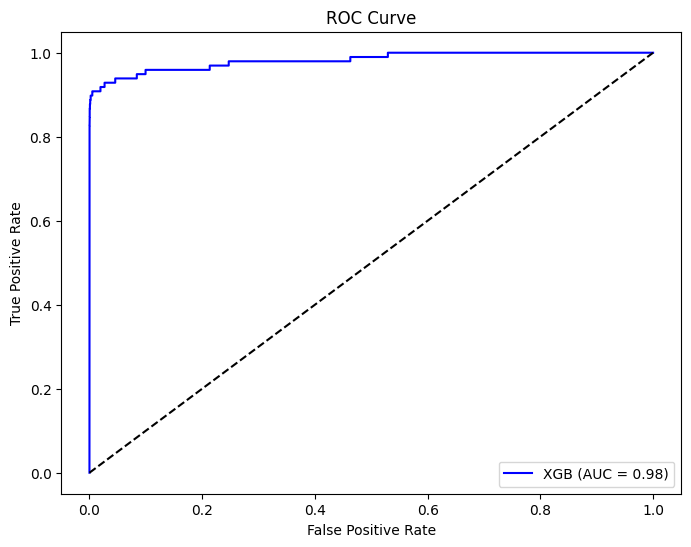

In [12]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="XGB (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba)), color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()